In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt
import seaborn as sns
plt.style.use("ggplot")
# pd.options.display.max_columns = 200
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/rollercoaster-database/coaster_db.csv
/kaggle/input/rollercoaster-database/flipflap.jpg


In [2]:
df = pd.read_csv("../input/rollercoaster-database/coaster_db.csv")
df = df[['coaster_name', 'Location',
#     'Length', 'Speed', 'Location', 'Status', 'Opening date', 'Type',
#     'Manufacturer', 'Height restriction', 'Model', 'Height',
#        'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
#        'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
#        'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
#        'Track layout', 'Fastrack available', 'Soft opening date.1',
#        'Closing date',
#     'Opened', 'Replaced by', 'Website',
#        'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
#        'Single rider line available', 'Restraint Style',
#        'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 
        'Type_Main',
       'opening_date_clean', 
#     'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 
#          'height_value', 'height_unit',
    'height_ft',
       'Inversions_clean', 'Gforce_clean']]

In [3]:
df["opening_date_clean"] = pd.to_datetime(df["opening_date_clean"])
df.isna().sum()

coaster_name            0
Location                0
year_introduced         0
latitude              275
longitude             275
Type_Main               0
opening_date_clean    250
speed_mph             150
height_ft             916
Inversions_clean        0
Gforce_clean          725
dtype: int64

In [4]:
df = df.loc[~df[["coaster_name", "opening_date_clean", "Location"]].duplicated()]
df = df.reset_index(drop=True)
df

,coaster_name,Location,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
985,Ice Breaker (roller coaster),SeaWorld Orlando,2022,28.4088,-81.4633,Steel,2022-02-01,52.0,NaN,0,NaN
986,Leviathan (Sea World),Sea World,2022,-27.9574,153.4263,Wood,2022-01-01,49.7,105.0,0,NaN
987,Pantheon (roller coaster),Busch Gardens Williamsburg,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
988,Tumbili,Kings Dominion,2022,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN


<Axes: xlabel='speed_mph', ylabel='height_ft'>

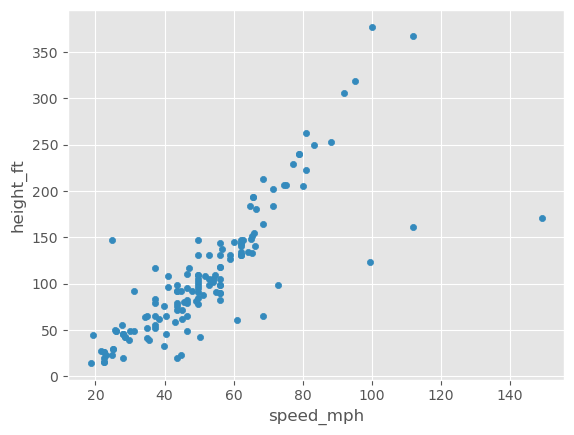

In [5]:
df.plot(x='speed_mph', y='height_ft', kind="scatter")

<Axes: xlabel='speed_mph', ylabel='height_ft'>

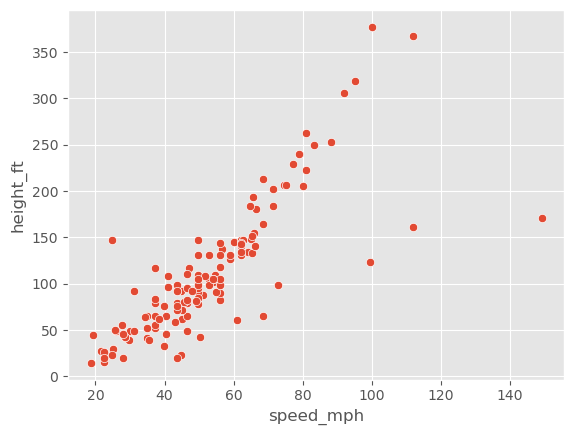

In [6]:
sns.scatterplot(x='speed_mph',
                y='height_ft',
                data=df
               )

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


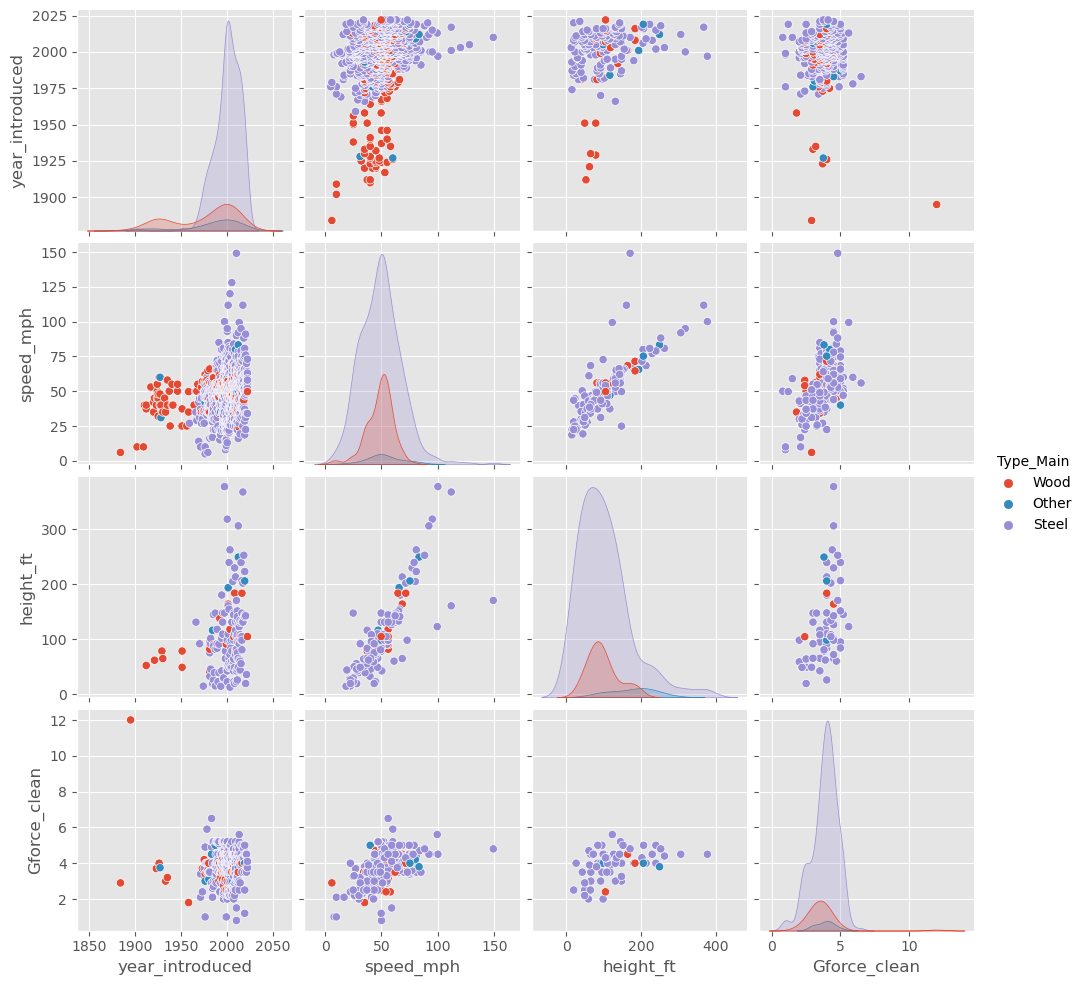

In [7]:
sns.pairplot(df,
            vars=["year_introduced", "speed_mph", "height_ft", "Gforce_clean"],
            hue="Type_Main"
            )

In [8]:
groupby = df.groupby("Location").count()
groupby

,coaster_name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
Location,,,,,,,,,,
"2904 Fantasy Way Myrtle Beach, South Carolina, U.S.",2,2,2,2,2,0,0,0,2,0
"63rd and N.W. Expressway, Oklahoma City, Oklahoma, U.S.",1,1,0,0,1,0,0,0,1,0
"8039 Beach BoulevardBuena Park, California 90620, U.S.",1,1,1,1,1,0,0,0,1,0
Adlabs Imagica,1,1,1,1,1,1,1,0,1,0
Adventure City,1,1,1,1,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
Xishuangbanna Theme Park,1,1,1,1,1,1,1,0,1,0
Yomiuriland,4,4,4,4,4,4,4,1,4,2
ZDT's Amusement Park,1,1,0,0,1,1,1,0,1,0


<Axes: xlabel='Location'>

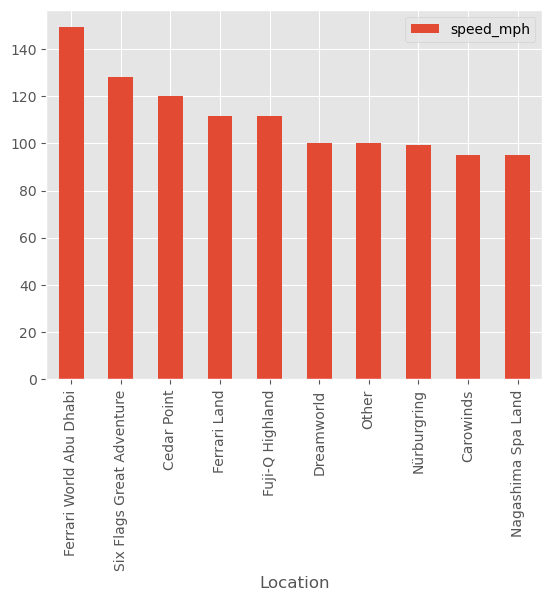

In [9]:
speed_df = df.sort_values(by="speed_mph", ascending=False)
bar_df = pd.DataFrame(speed_df.groupby(by="Location")["speed_mph"].max().nlargest(10))
bar_df.reset_index(inplace=True)
bar_df.plot(x= "Location", y="speed_mph", kind="bar")

In [10]:
speed_df

,coaster_name,Location,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
758,Formula Rossa,Ferrari World Abu Dhabi,2010,24.4842,54.6124,Steel,2010-11-04,149.1,170.6,0,4.8
648,Kingda Ka,Six Flags Great Adventure,2005,40.1392,-74.4365,Steel,2005-05-21,128.0,NaN,0,NaN
608,Top Thrill Dragster,Cedar Point,2003,41.4840,-82.6862,Steel,2003-05-04,120.0,NaN,0,NaN
540,Do-Dodonpa,Fuji-Q Highland,2001,35.4877,138.7823,Steel,2001-12-21,111.8,160.8,1,NaN
912,Red Force (roller coaster),Ferrari Land,2017,NaN,NaN,Steel,2017-04-07,111.8,367.5,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
925,Merlin's Mayhem,Dutch Wonderland,2018,40.0287,-76.2186,Steel,2018-04-28,NaN,NaN,0,NaN
943,Hurricane (Fun Spot America),"Orlando, FloridaKissimmee, FloridaFayetteville...",2019,28.3303,-81.5147,Other,NaT,NaN,NaN,0,NaN
971,Looping Star (Clacton Pier),Clacton Pier,2021,51.7864,-1.1550,Steel,2021-10-23,NaN,36.1,1,NaN
974,Storm Chaser (Paultons Park),Paultons Park,2021,50.9490,-1.5505,Steel,2021-04-12,NaN,NaN,0,NaN
